Name：Chuhao Luo

Student ID: v00987151

In [137]:
import numpy as np
import pandas as pd
import random
from tensorflow import keras
from keras.datasets import fashion_mnist
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Preprocess the dataset

In [138]:
#load dataset from kaggle
df = pd.read_csv('/Users/howardluo/Desktop/474/project/archive/images.csv')
display(df)

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False
...,...,...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,204,Shorts,False
5399,befa14be-8140-4faf-8061-1039947e329d,204,Body,True
5400,5379356a-40ee-4890-b416-2336a7d84061,310,Shorts,False
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,204,Shoes,False


In [139]:
#Load the Fashion-MNIST dataset and split into train and test
(xTrain,yTrain), (xTest,yTest) = fashion_mnist.load_data()
#reshape the xTrain
xTrain = np.reshape(xTrain,(xTrain.shape[0],xTrain.shape[1]*xTrain.shape[2]))

In [140]:
#get T-shirt(0),trouser(1),pullover(2),dress(3),coat(4),shirt(6),sneaker(7) from xTrain and yTrain
x_fm = []
y_fm = []
for i in range(yTrain.size):
    if yTrain[i] in [0,1,2,3,4,6,7]:
        x_fm.append(xTrain[i])
        y_fm.append(yTrain[i])
x_fm = np.array(x_fm)
y_fm = np.array(y_fm)
np.unique(y_fm)

array([0, 1, 2, 3, 4, 6, 7], dtype=uint8)

In [141]:
print(y_fm.size)

42000


In [142]:
y_fm[y_fm==0]=0  #T-shirt
y_fm[y_fm==1]=1  #Trouser
y_fm[y_fm==2]=2  #Pullover
y_fm[y_fm==3]=3  #Dress
y_fm[y_fm==4]=4  #Coat
y_fm[y_fm==6]=5  #Shirt
y_fm[y_fm==7]=6  #Sneaker


In [143]:
ss = StandardScaler()
x_fm = ss.fit_transform(x_fm)

In [144]:
df["label"].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

In [145]:
df1=df[['image','label']]
df1

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes
...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,Shorts
5399,befa14be-8140-4faf-8061-1039947e329d,Body
5400,5379356a-40ee-4890-b416-2336a7d84061,Shorts
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,Shoes


In [180]:
path = '/Users/howardluo/Desktop/474/project/archive/images_original'

files= os.listdir(path)

In [181]:
#preprocess(read pic)
h = 28
w = 28
x = []
y = []
for f in files:
    img = cv2.imread(path+'/'+f, cv2.IMREAD_GRAYSCALE)
    pic = f.replace('.jpg', '')
    for i, label in enumerate(df1['image']):
        if label == pic:
            # background remove 
            _, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            segmented_img = cv2.bitwise_and(img, img, mask=binary_img)

            resized_img = cv2.resize(segmented_img, (h, w))
            x.append(resized_img.flatten())
            y.append(df1.loc[i, 'label'])  # Assuming df1 is a DataFrame with 'label' column
    
x = np.array(x)
y = np.array(y)


In [182]:
# Horizontal rotate
flip_x = []
for image in x:
    flipped_image = cv2.flip(image, 1)  
    
    flip_x.append(flipped_image.reshape(-1))

flipped_x = np.array(flip_x)

In [183]:
flipped_x1 = flipped_x.reshape(-1)

In [184]:
print (flipped_x1.size)
print (x.size)
x.ndim
y.size

4235952
4235952


5403

In [185]:
flipped_x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 238, 210,   0,   0,   0,   0,   0,   0,   0, 198,
       205, 186,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 173, 186, 200, 195, 227, 211, 213, 192,
       209, 198, 227, 184,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 199, 210, 202, 210, 22

In [186]:
data = np.array(x[0])
print (data.ndim)

1


In [187]:
print (x[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 238 210   0   0   0   0
   0   0   0 198 205 186   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 173 186 200 195 227 211 213 192 209 198 227 184   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 199 210 202 210
 223 198 218 217 199 232 228 231   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 216 232 226 223 219 200 226 203 234 239 231 210
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 225 220 223
 222 234 231 223 216 227 226 208 215 226 220   0   

In [188]:
print(y)

['Undershirt' 'Longsleeve' 'T-Shirt' ... 'Other' 'Undershirt' 'Shirt']


In [189]:
data = []
data_label = []
for i in range(y.size):
    if y[i] in ['T-Shirt','Pants','Longsleeve','Dress','Outwear','Shirt','Shoes']:
        data.append(flipped_x[i])
        data_label.append(y[i])
# data=np.array(data)
# data_label=np.array(data_label)
np.unique(data_label)

len(data)

3880

In [190]:
flip_data = []
flip_data_label = []
for i in range(y.size):
    if y[i] in ['T-Shirt','Pants','Longsleeve','Dress','Outwear','Shirt','Shoes']:
        flip_data.append(x[i])
        flip_data_label.append(y[i])
# flip_data=np.array(flip_data)
# data_label=np.array(data_label)
np.unique(data_label)
len(flip_data)

3880

In [191]:
Merge_data = data + flip_data
Merge_data_label = data_label + flip_data_label

Merge_data = np.array(Merge_data)
Merge_data_label = np.array(Merge_data_label)

In [192]:
data=np.array(data)
data_label=np.array(data_label)

flip_data=np.array(flip_data)
flip_data_label=np.array(flip_data_label)

In [193]:
Merge_data_label[Merge_data_label=='T-Shirt']=0    #T-Shirt
Merge_data_label[Merge_data_label=='Pants']=1      #Trouser 
Merge_data_label[Merge_data_label=='Longsleeve']=2 #Pullover
Merge_data_label[Merge_data_label=='Dress']=3      #Dress
Merge_data_label[Merge_data_label=='Outwear']=4    #Coat
Merge_data_label[Merge_data_label=='Shirt']=5      #Shirt
Merge_data_label[Merge_data_label=='Shoes']=6      #Sneaker
#data_label[data_label=='Hat']=7



In [194]:
ss = StandardScaler()
data = ss.fit_transform(Merge_data)



In [195]:
Merge_data_label=Merge_data_label.reshape(Merge_data_label.shape[0]).astype('int')

In [196]:
data_label.size

3880

# Train and test on the dataset from kaggle

In [104]:
#split the data into train and test
train_x,test_x,train_y,test_y=train_test_split(Merge_data, Merge_data_label, test_size = 0.2)

In [105]:
model = RandomForestClassifier(n_estimators=100,criterion="gini" ,random_state=99)
model.fit(train_x,train_y)

y_pred = model.predict(test_x)

accuracy = accuracy_score(test_y,y_pred)
print("accuracy", accuracy)

accuracy 0.9265463917525774


In [106]:
model = RandomForestClassifier(n_estimators=100,criterion="entropy" ,random_state=99)
model.fit(train_x,train_y)

y_pred = model.predict(test_x)

accuracy = accuracy_score(test_y,y_pred)
print("accuracy", accuracy)

accuracy 0.9278350515463918


Text(33.0, 0.5, 'Actual')

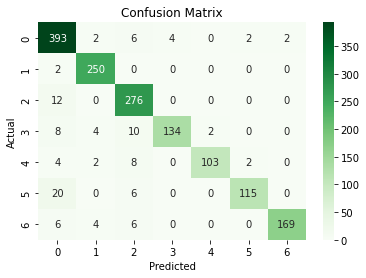

In [107]:
matrix = confusion_matrix(test_y,y_pred)
sns.heatmap(matrix,cmap="Greens", annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [108]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       409
           1       0.95      0.99      0.97       252
           2       0.88      0.96      0.92       288
           3       0.97      0.85      0.91       158
           4       0.98      0.87      0.92       119
           5       0.97      0.82      0.88       141
           6       0.99      0.91      0.95       185

    accuracy                           0.93      1552
   macro avg       0.95      0.91      0.92      1552
weighted avg       0.93      0.93      0.93      1552



In [109]:
mean_squared_error(test_y,y_pred)

0.9123711340206185


# Train on kaggle dataset and test on fashion mnist dataset

In [53]:
#use kaggle dataset for train
train_x = Merge_data
train_y = Merge_data_label
#use fashion mnist dataset for test
test_x = x_fm
test_y = y_fm

In [54]:

# Create and train the decision tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
model.fit(train_x, train_y)

# Predict the labels for the test set
y_pred = model.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.14285714285714285


# Train on kaggle dataset and test on fashion mnist dataset

In [166]:
#use kaggle dataset for train
train_x = Merge_data
train_y = Merge_data_label
#use fashion mnist dataset for test
test_x = x_fm
test_y = y_fm

In [167]:
model = RandomForestClassifier(n_estimators=100,criterion="gini" ,random_state=99)
model.fit(train_x,train_y)

y_pred = model.predict(test_x)

accuracy = accuracy_score(test_y,y_pred)
print("accuracy", accuracy)

accuracy 0.14323809523809525


Text(33.0, 0.5, 'Actual')

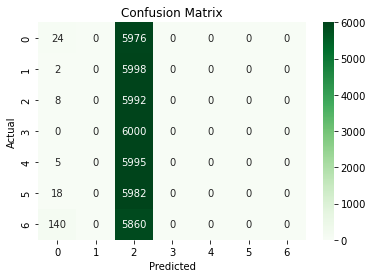

In [168]:
matrix = confusion_matrix(test_y,y_pred)
sns.heatmap(matrix,cmap="Greens", annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [169]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.12      0.00      0.01      6000
           1       0.00      0.00      0.00      6000
           2       0.14      1.00      0.25      6000
           3       0.00      0.00      0.00      6000
           4       0.00      0.00      0.00      6000
           5       0.00      0.00      0.00      6000
           6       0.00      0.00      0.00      6000

    accuracy                           0.14     42000
   macro avg       0.04      0.14      0.04     42000
weighted avg       0.04      0.14      0.04     42000



/Users/howardluo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/howardluo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/howardluo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
mean_squared_error(test_y,y_pred)

5.073428571428572

#  Train on fashion mnist dataset and test on kaggle dataset

In [171]:
(train_images, train_labels), _ = fashion_mnist.load_data()
#use fashion mnist dataset for train
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images.reshape(-1, 28*28))

# Use only half of the data for training
num_samples = len(train_images) // 2
train_x = train_images[:num_samples]
train_y = train_labels[:num_samples]
#use kaggle dataset for test
test_x = Merge_data
test_y = Merge_data_label

In [172]:
# Create and train the decision tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
model.fit(train_x, train_y)

# Predict the labels for the test set
y_pred = model.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.08067010309278351


Text(33.0, 0.5, 'Actual')

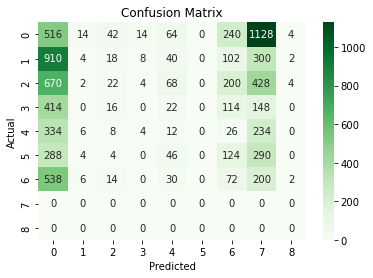

In [173]:
matrix = confusion_matrix(test_y,y_pred)
sns.heatmap(matrix,cmap="Greens", annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [174]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.26      0.18      2022
           1       0.11      0.00      0.01      1384
           2       0.18      0.02      0.03      1398
           3       0.00      0.00      0.00       714
           4       0.04      0.02      0.03       624
           5       0.00      0.00      0.00       756
           6       0.08      0.08      0.08       862
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.08      7760
   macro avg       0.06      0.04      0.04      7760
weighted avg       0.10      0.08      0.06      7760



/Users/howardluo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/howardluo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/howardluo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/howardlu

In [175]:
mean_squared_error(test_y,y_pred)

22.0979381443299

# Train and test on fashion mnist dataset

In [176]:
#split the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x_fm, y_fm, test_size = 0.9, random_state = 99,stratify=y_fm)

In [177]:
# Create and train the decision tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
model.fit(train_x, train_y)

# Predict the labels for the test set
y_pred = model.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7269047619047619


In [ ]:
#Use cross validation to find the best value of c
C = [np.exp(i) for i in np.linspace(-6,6,10)]  
accuracy_list=[]
for c in C:
    model = OneVsOneClassifier(SVC(C=c,kernel='rbf',gamma='scale'))
    clf = model.fit(train_x,train_y)
    y_pred = clf.predict(test_x)
    accuracy=accuracy_score(y_pred,test_y)
    accuracy_list.append(accuracy)
    print('C =',c,'Accuracy :',accuracy)

C=[np.log(y) for y in C] # make the plot look better
plt.plot(C,accuracy_list,c = 'b')
plt.ylabel('Accuracy')
plt.xlabel('log(C)')
plt.title('Accuracy against value of C')
plt.show()

Text(33.0, 0.5, 'Actual')

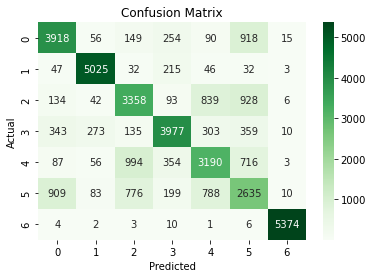

In [66]:
matrix = confusion_matrix(test_y,y_pred)
sns.heatmap(matrix,cmap="Greens", annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [67]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      5400
           1       0.91      0.93      0.92      5400
           2       0.62      0.62      0.62      5400
           3       0.78      0.74      0.76      5400
           4       0.61      0.59      0.60      5400
           5       0.47      0.49      0.48      5400
           6       0.99      1.00      0.99      5400

    accuracy                           0.73     37800
   macro avg       0.73      0.73      0.73     37800
weighted avg       0.73      0.73      0.73     37800



In [68]:
mean_squared_error(test_y,y_pred)

2.3373809523809523

# Combine the two datasets together

In [127]:

y_combine = np.hstack((y_fm[:3880],Merge_data_label))
x_combine = np.vstack((x_fm[:3880],Merge_data))

In [128]:
#split the data into train and test
train_x,test_x,train_y,test_y=train_test_split(x_combine, y_combine, test_size = 0.05, random_state = 99)

In [130]:
model = RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=0)
model.fit(train_x, train_y)
# Predict the labels for the test set
y_pred = model.predict(test_x)
# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9072164948453608


In [132]:
model = RandomForestClassifier(n_estimators=100,criterion="gini", random_state=0)
model.fit(train_x, train_y)
# Predict the labels for the test set
y_pred = model.predict(test_x)
# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9089347079037801


Text(33.0, 0.5, 'Actual')

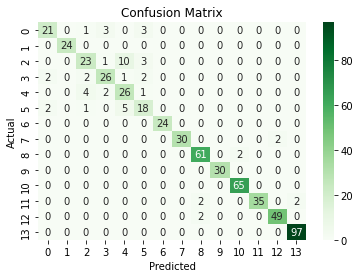

In [133]:
matrix = confusion_matrix(test_y,y_pred)
sns.heatmap(matrix,cmap="Greens", annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [134]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       1.00      1.00      1.00        24
           2       0.74      0.62      0.68        37
           3       0.81      0.79      0.80        33
           4       0.62      0.79      0.69        33
           5       0.67      0.69      0.68        26
           6       1.00      1.00      1.00        24
       Dress       1.00      0.94      0.97        32
  Longsleeve       0.94      0.97      0.95        63
     Outwear       1.00      1.00      1.00        30
       Pants       0.97      1.00      0.98        65
       Shirt       1.00      0.90      0.95        39
       Shoes       0.96      0.96      0.96        51
     T-Shirt       0.98      1.00      0.99        97

    accuracy                           0.91       582
   macro avg       0.89      0.89      0.89       582
weighted avg       0.91      0.91      0.91       582



In [74]:
mean_squared_error(test_y,y_pred)

0.7302405498281787